asdfjk;l

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


elig_df = elig_df.astype({"Child_ID": 'float'})

###idea

In [2]:
eco = pd.read_excel("../data/TEIS-NSS Project Data 10-2022.xlsx",sheet_name=('ECO with Exit21-22'))
elig = pd.read_excel("../data/TEIS-NSS Project Data 10-2022.xlsx",sheet_name=('Elig Timeline Rpt 2018-2022'))

In [3]:
eco.head()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,ExitIS_SOCIAL_PROGRESS,ExitIS_KNOWLEDGE_PROGRESS,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason,Exit Date,<Lookup> Expected Rating,<Calc> Months in Program,<Calc> Entrance Age (months),<Calc> Day count,<Calc> Month count,<Calc> Missing Entrance Date,<Calc> Missing Exit Dates,<Calc> Missing Both Ent & Exit Dates,<Calc> Record Count,<Calc> Day count 182 days +,<Calc> Exit Day cnt < 182 days,OC1 Missing Exit Rating,OC2 Missing Exit Rating,OC3 Missing Exit Rating,OC1 Not Expected,OC2 Not Expected,OC3 Not Expected,<Calc> Day count less than 182,OC1 Useable Data,OC2 Useable Data,OC3 Useable Data,Usable Data on at least one Outcome,Usable Data on All 3 Outcomes,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC1 Data Check,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,Yes,Yes,Yes,2021-04-23,618 - Part B eligible,2021-11-15,Yes,7.0,36.0,183.0,6.100000,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,Yes,Yes,Yes,2020-03-23,618 - Completion of IFSP/ no longer requires s...,2022-02-25,Yes,23.0,36.0,514.0,17.133333,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-14,618 - Part B eligible,2022-02-06,Yes,4.0,36.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,Yes,Yes,Yes,2019-01-31,618 - Part B eligible,2021-12-19,Yes,35.0,36.0,1026.0,34.200000,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-26,618 - Parent withdraw,2022-02-01,Yes,6.0,32.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0


In [4]:
elig.head()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,Date Assigned to Dev. Evaluator,Dates Dev. Evaluator Attempted to Contact Family,Date Dev. Evaluator Actually Contacted Family,Dates Med. Records Requested,Date Med. Records Rec'd,Date Med. Records Entered,TEIS Vision Screening Form?,TEIS Hearing Screening Form?,Date Initial Dev. Eval. Completed,Motor DQ,Cognitive DQ,Communication DQ,Self Help DQ,Social/Emotional DQ DQ,# Days Ref. to Init. Contact,# Days Ref. to Actual Contact,# Days Ref. to Dev. Evaluator Ref. Rec'd,# Days Ref. to Completion of Dev. Eval.,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,2019-01-22 00:00:00,"01/22/2019, 01/28/2019",2019-01-28 00:00:00,NaN,NaN,NaN,Y,Y,2019-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,4.0,10.0,4.0,34.0,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,2018-09-12 00:00:00,2018-09-12 00:00:00,2018-09-12 00:00:00,NaN,NaN,NaN,Y,Y,2018-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,14.0,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,2019-05-15 00:00:00,"05/16/2019, 05/21/2019, 05/29/2019",2019-05-29 00:00:00,2019-05-14 00:00:00,2019-05-14 00:00:00,2019-05-31 00:00:00,Y,Y,2019-05-30 00:00:00,NaN,NaN,NaN,NaN,NaN,2.0,15.0,1.0,16.0,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,2018-10-11 00:00:00,2018-10-11 00:00:00,2018-10-11 00:00:00,NaN,NaN,NaN,N,N,2018-10-25 00:00:00,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,16.0,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,2019-04-02 00:00:00,2019-04-02 00:00:00,2019-04-02 00:00:00,2019-04-11 00:00:00,2019-04-11 00:00:00,2019-04-11 00:00:00,Y,Y,2019-04-10 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,9.0,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw


In [5]:
eco.shape

(8636, 60)

In [6]:
elig.shape

(67610, 38)

In [7]:
eco.dtypes

DISTRICT                                        object
CHILD_ID                                       float64
ECO_Entry_DATE                          datetime64[ns]
Ent SOCIAL_SCALE                               float64
Ent KNOWLEDGE_SCALE                            float64
Ent APPROPRIATE_ACTION_SCALE                   float64
ECO_Exit_DATE                           datetime64[ns]
Exit SOCIAL_SCALE                              float64
Exit KNOWLEDGE_SCALE                           float64
Exit APPROPRIATE_ACTION_SCALE                  float64
ExitIS_SOCIAL_PROGRESS                          object
ExitIS_KNOWLEDGE_PROGRESS                       object
ExitIS_APPROPRIATE_ACTION_PROGRESS              object
Initial IFSP Date                       datetime64[ns]
Exit Reason                                     object
Exit Date                               datetime64[ns]
<Lookup> Expected Rating                        object
<Calc> Months in Program                       float64
<Calc> Ent

In [8]:
elig.dtypes

District                                                    object
Child ID                                                     int64
Child Status                                                object
Child Phase                                                 object
Init. IFSP Due Date                                 datetime64[ns]
IFSP Due Date                                       datetime64[ns]
IFSP Late Reason                                            object
Active Ref. Date                                    datetime64[ns]
Parent Consent/Intake Date                          datetime64[ns]
Date Dev. Evaluator Rec'd. Ref.                             object
Date Assigned to Dev. Evaluator                             object
Dates Dev. Evaluator Attempted to Contact Family            object
Date Dev. Evaluator Actually Contacted Family               object
Dates Med. Records Requested                                object
Date Med. Records Rec'd                                     ob

In [9]:
eco.tail()

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,ExitIS_SOCIAL_PROGRESS,ExitIS_KNOWLEDGE_PROGRESS,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason,Exit Date,<Lookup> Expected Rating,<Calc> Months in Program,<Calc> Entrance Age (months),<Calc> Day count,<Calc> Month count,<Calc> Missing Entrance Date,<Calc> Missing Exit Dates,<Calc> Missing Both Ent & Exit Dates,<Calc> Record Count,<Calc> Day count 182 days +,<Calc> Exit Day cnt < 182 days,OC1 Missing Exit Rating,OC2 Missing Exit Rating,OC3 Missing Exit Rating,OC1 Not Expected,OC2 Not Expected,OC3 Not Expected,<Calc> Day count less than 182,OC1 Useable Data,OC2 Useable Data,OC3 Useable Data,Usable Data on at least one Outcome,Usable Data on All 3 Outcomes,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC1 Data Check,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
8631,UC,514216.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-07,618 - Parent withdraw,2022-02-10,Yes,2.0,12.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,65.0,-44537.0,-44537.0
8632,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8633,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8634,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8635,9/29/22 JM Corrected in TEIDS. Progress would ...,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
elig.tail()

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,Date Assigned to Dev. Evaluator,Dates Dev. Evaluator Attempted to Contact Family,Date Dev. Evaluator Actually Contacted Family,Dates Med. Records Requested,Date Med. Records Rec'd,Date Med. Records Entered,TEIS Vision Screening Form?,TEIS Hearing Screening Form?,Date Initial Dev. Eval. Completed,Motor DQ,Cognitive DQ,Communication DQ,Self Help DQ,Social/Emotional DQ DQ,# Days Ref. to Init. Contact,# Days Ref. to Actual Contact,# Days Ref. to Dev. Evaluator Ref. Rec'd,# Days Ref. to Completion of Dev. Eval.,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
67605,UC,509553,Inactive,IFSP,2021-10-03,2021-10-22,System,2021-08-19,2021-08-26,2021-08-23 00:00:00,2021-08-23 00:00:00,2021-08-23 00:00:00,2021-08-23 00:00:00,"09/07/2021, 09/29/2021, 10/12/2021",2021-10-12 00:00:00,2021-10-12 00:00:00,Y,Y,2021-08-26 00:00:00,68.0,70.0,67.0,60.0,68.0,4.0,4.0,4.0,7.0,0.0,3.0,35.0,47.0,54.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2021-10-12,2021-12-10,618 - Moved out of state
67606,UC,509684,Inactive,IFSP,2021-10-07,2021-09-07,NaN,2021-08-23,2021-08-31,2021-08-24 00:00:00,2021-08-24 00:00:00,2021-08-24 00:00:00,2021-08-24 00:00:00,2021-08-23 00:00:00,2021-08-23 00:00:00,2021-09-02 00:00:00,Y,Y,2021-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,8.0,0.0,7.0,0.0,2.0,10.0,Eligible,Developmental Evaluation,2021-09-02,2022-03-07,618 - Parent withdraw
67607,UC,526338,Inactive,IFSP,2022-05-22,2022-05-05,NaN,2022-04-07,2022-04-10,2022-04-08 00:00:00,2022-04-08 00:00:00,2022-04-08 00:00:00,2022-04-08 00:00:00,2022-04-07 00:00:00,2022-04-07 00:00:00,2022-04-13 00:00:00,Y,Y,2022-04-11 00:00:00,83.0,97.0,75.0,65.0,88.0,1.0,1.0,1.0,4.0,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation,2022-04-13,2022-07-25,618 - Parent withdraw
67608,UC,511641,Inactive,Eligibility,2021-11-22,NaT,NaN,2021-10-08,2021-10-18,2021-10-11 00:00:00,2021-10-11 00:00:00,2021-10-11 00:00:00,2021-10-11 00:00:00,NaN,NaN,NaN,N,N,2021-10-18 00:00:00,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,10.0,0.0,7.0,NaN,11.0,21.0,Eligible,Diagnosed Condition,2021-10-29,2022-06-22,Parent decline
67609,UC,519977,Inactive,IFSP,2022-03-07,2022-02-03,NaN,2022-01-21,2022-01-26,2022-01-24 00:00:00,2022-01-24 00:00:00,2022-01-24 00:00:00,2022-01-24 00:00:00,2022-01-21 00:00:00,2022-01-21 00:00:00,2022-01-31 00:00:00,Y,Y,2022-01-26 00:00:00,102.0,100.0,83.0,68.0,92.0,3.0,3.0,3.0,5.0,0.0,2.0,0.0,5.0,10.0,Eligible,Developmental Evaluation,2022-01-31,2022-06-20,618 - Part B eligible


In [11]:
ieg = elig['Init. Elig. Category']

In [12]:
ieg.unique()

array(['Developmental Evaluation',
       'Diagnosed Condition, Developmental Evaluation',
       'Diagnosed Condition', nan], dtype=object)

In [13]:
elig = elig.astype({"Child ID": 'float'})

In [14]:
elig = elig.rename(columns={'District': 'district', 'Child ID': 'child_id'})

In [15]:
eco = eco.rename(columns={'DISTRICT': 'district', 'CHILD_ID': 'child_id'})

In [16]:
eco_elig_combined = pd.merge(eco, elig, how="outer", on=["district", "child_id"])

In [17]:
eco_elig_combined.head(1)

,district,child_id,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,ExitIS_SOCIAL_PROGRESS,ExitIS_KNOWLEDGE_PROGRESS,ExitIS_APPROPRIATE_ACTION_PROGRESS,Initial IFSP Date,Exit Reason_x,Exit Date_x,<Lookup> Expected Rating,<Calc> Months in Program,<Calc> Entrance Age (months),<Calc> Day count,<Calc> Month count,<Calc> Missing Entrance Date,<Calc> Missing Exit Dates,<Calc> Missing Both Ent & Exit Dates,<Calc> Record Count,<Calc> Day count 182 days +,<Calc> Exit Day cnt < 182 days,OC1 Missing Exit Rating,OC2 Missing Exit Rating,OC3 Missing Exit Rating,OC1 Not Expected,OC2 Not Expected,OC3 Not Expected,<Calc> Day count less than 182,OC1 Useable Data,OC2 Useable Data,OC3 Useable Data,Usable Data on at least one Outcome,Usable Data on All 3 Outcomes,OC1 - a,OC1 - b,OC1 - c,OC1 - d,OC1 - e,OC1 Data Check,OC2 - a,OC2 - b,OC2 - c,OC2 - d,OC2 - e,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,Date Assigned to Dev. Evaluator,Dates Dev. Evaluator Attempted to Contact Family,Date Dev. Evaluator Actually Contacted Family,Dates Med. Records Requested,Date Med. Records Rec'd,Date Med. Records Entered,TEIS Vision Screening Form?,TEIS Hearing Screening Form?,Date Initial Dev. Eval. Completed,Motor DQ,Cognitive DQ,Communication DQ,Self Help DQ,Social/Emotional DQ DQ,# Days Ref. to Init. Contact,# Days Ref. to Actual Contact,# Days Ref. to Dev. Evaluator Ref. Rec'd,# Days Ref. to Completion of Dev. Eval.,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date_y,Exit Reason_y
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,Yes,Yes,Yes,2021-04-23,618 - Part B eligible,2021-11-15,Yes,7.0,36.0,183.0,6.1,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0,Inactive,IFSP,2021-05-09,2021-04-23,NaN,2021-03-25,2021-03-29,2021-03-29 00:00:00,2021-03-29 00:00:00,2021-03-29 00:00:00,2021-03-29 00:00:00,"03/30/2021, 04/05/2021, 04/14/2021",NaN,NaN,Y,Y,2021-04-05 00:00:00,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,11.0,7.0,7.0,NaN,9.0,20.0,Eligible,Developmental Evaluation,2021-04-14,2021-11-15,618 - Part B eligible


In [18]:
eco_elig_combined = eco_elig_combined[['district', 'child_id', '<Calc> Months in Program', 'Ent SOCIAL_SCALE', 'Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'Exit SOCIAL_SCALE', 'Exit KNOWLEDGE_SCALE', 'Exit APPROPRIATE_ACTION_SCALE', 'Init. Elig. Category', 'OC1 Data Check']]

In [19]:
eco_elig_combined.head()

,district,child_id,<Calc> Months in Program,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,Init. Elig. Category,OC1 Data Check
0,ET,500335.0,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0
1,ET,479453.0,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
2,ET,510663.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
3,ET,452482.0,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0
4,ET,506507.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0


In [20]:
eco_elig_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67623 entries, 0 to 67622
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   district                       67620 non-null  object 
 1   child_id                       67619 non-null  float64
 2   <Calc> Months in Program       8632 non-null   float64
 3   Ent SOCIAL_SCALE               5721 non-null   float64
 4   Ent KNOWLEDGE_SCALE            5721 non-null   float64
 5   Ent APPROPRIATE_ACTION_SCALE   5721 non-null   float64
 6   Exit SOCIAL_SCALE              5721 non-null   float64
 7   Exit KNOWLEDGE_SCALE           5721 non-null   float64
 8   Exit APPROPRIATE_ACTION_SCALE  5721 non-null   float64
 9   Init. Elig. Category           38290 non-null  object 
 10  OC1 Data Check                 8632 non-null   float64
dtypes: float64(9), object(2)
memory usage: 6.2+ MB


In [21]:
eco_elig_combined.columns = ['district', 'child_id', 'month_count', 'ent_social', 'ent_knowledge', 'ent_app_action', 'exit_social', 'exit_knowledge', 'exit_app_action', 'elig_cat', 'oc1_data_check']


In [22]:
eco_elig_combined

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check
0,ET,500335.0,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0
1,ET,479453.0,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
2,ET,510663.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
3,ET,452482.0,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0
4,ET,506507.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
...,...,...,...,...,...,...,...,...,...,...,...
67618,UC,514221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67619,UC,525915.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67620,UC,516841.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN
67621,UC,526338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,NaN


## ideas - 

eco_elig_combined2 = eco_elig_combined2[eco_elig_combined2['OC1 Data Check'].notna()]


In [23]:
eco_elig_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67623 entries, 0 to 67622
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district         67620 non-null  object 
 1   child_id         67619 non-null  float64
 2   month_count      8632 non-null   float64
 3   ent_social       5721 non-null   float64
 4   ent_knowledge    5721 non-null   float64
 5   ent_app_action   5721 non-null   float64
 6   exit_social      5721 non-null   float64
 7   exit_knowledge   5721 non-null   float64
 8   exit_app_action  5721 non-null   float64
 9   elig_cat         38290 non-null  object 
 10  oc1_data_check   8632 non-null   float64
dtypes: float64(9), object(2)
memory usage: 6.2+ MB


In [24]:
eco_elig_combined = eco_elig_combined[eco_elig_combined['oc1_data_check'].notna()]

In [25]:
eco_elig_combined.head()

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check
0,ET,500335.0,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0
1,ET,479453.0,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
2,ET,510663.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
3,ET,452482.0,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0
4,ET,506507.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0


In [26]:
eco_elig_combined.shape

(8632, 11)

In [27]:
eco_elig_combined.head()

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check
0,ET,500335.0,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0
1,ET,479453.0,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0
2,ET,510663.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0
3,ET,452482.0,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0
4,ET,506507.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0


USING JONATHAN'S CODE TO COMBINE DF INSTEAD OF BY ELIG CAT !!!!!!!!!!!

In [28]:
eco_elig_combined['social_change'] = eco_elig_combined['exit_social'] - eco_elig_combined['ent_social']
eco_elig_combined['knowledge_change'] = eco_elig_combined['exit_knowledge'] - eco_elig_combined['ent_knowledge']
eco_elig_combined['app_action_change'] = eco_elig_combined['exit_app_action'] - eco_elig_combined['ent_app_action'] 

eco_elig_combined.head(20)



C:\Users\rober\AppData\Local\Temp\ipykernel_23756\3567006292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_elig_combined['social_change'] = eco_elig_combined['exit_social'] - eco_elig_combined['ent_social']
C:\Users\rober\AppData\Local\Temp\ipykernel_23756\3567006292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_elig_combined['knowledge_change'] = eco_elig_combined['exit_knowledge'] - eco_elig_combined['ent_knowledge']
C:\Users\rober\AppData\Local\Temp\ipykernel_23756\3567006292.py:3: Se

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check,social_change,knowledge_change,app_action_change
0,ET,500335.0,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0,1.0,0.0,0.0
1,ET,479453.0,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0,0.0,0.0,0.0
2,ET,510663.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0,NaN,NaN,NaN
3,ET,452482.0,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0,3.0,0.0,2.0
4,ET,506507.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0,NaN,NaN,NaN
5,ET,494216.0,9.0,2.0,4.0,6.0,4.0,5.0,7.0,Developmental Evaluation,1.0,2.0,1.0,1.0
6,ET,449725.0,14.0,4.0,5.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0,3.0,2.0,0.0
7,ET,494502.0,9.0,6.0,4.0,5.0,7.0,5.0,6.0,Developmental Evaluation,1.0,1.0,1.0,1.0
8,ET,488351.0,11.0,5.0,5.0,7.0,6.0,5.0,7.0,Developmental Evaluation,1.0,1.0,0.0,0.0
9,ET,489949.0,18.0,2.0,1.0,2.0,1.0,4.0,5.0,"Diagnosed Condition, Developmental Evaluation",1.0,-1.0,3.0,3.0


<AxesSubplot:>

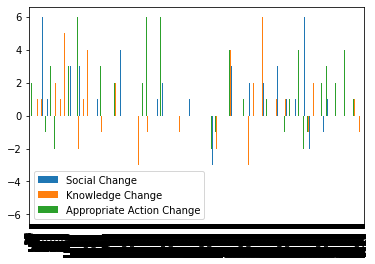

In [68]:
# plotthis = eco_elig_combined[['elig_cat', 'social_change', 'knowledge_change', 'app_action_change']]
# plotthis = plotthis.rename(columns={'elig_cat': 'Eligibility Category', 'social_change': 'Social Change', 'knowledge_change' : 'Knowledge Change', 'app_action_change' : 'Appropriate Action Change'})
# plotthis.head()
# plotthis.plot(kind="bar")
#experimenting but not gonna make final prez

In [29]:
elig_cat1 = eco_elig_combined.loc[eco_elig_combined['elig_cat'] == 'Developmental Evaluation']
elig_cat1.head()

##df.loc[df['column_name'] == some_value]


,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check,social_change,knowledge_change,app_action_change
0,ET,500335.0,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0,1.0,0.0,0.0
1,ET,479453.0,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0,0.0,0.0,0.0
2,ET,510663.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0,NaN,NaN,NaN
3,ET,452482.0,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0,3.0,0.0,2.0
4,ET,506507.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0,NaN,NaN,NaN


In [30]:
ec1socchange = elig_cat1['exit_social'] - elig_cat1['ent_social']
ec1apacchange = elig_cat1['exit_app_action'] - elig_cat1['ent_app_action']
ec1knowchange = elig_cat1['exit_knowledge'] - elig_cat1['ent_knowledge']

elig_cat1['Social Change'] = ec1socchange
elig_cat1['App Action Change'] = ec1apacchange
elig_cat1['Knowledge Change'] = ec1knowchange
elig_cat1.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_23756\1324458190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_cat1['Social Change'] = ec1socchange
C:\Users\rober\AppData\Local\Temp\ipykernel_23756\1324458190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_cat1['App Action Change'] = ec1apacchange
C:\Users\rober\AppData\Local\Temp\ipykernel_23756\1324458190.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check,social_change,knowledge_change,app_action_change,Social Change,App Action Change,Knowledge Change
0,ET,500335.0,7.0,5.0,3.0,4.0,6.0,3.0,4.0,Developmental Evaluation,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,ET,479453.0,23.0,7.0,7.0,7.0,7.0,7.0,7.0,Developmental Evaluation,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ET,510663.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ET,452482.0,35.0,2.0,3.0,3.0,5.0,3.0,5.0,Developmental Evaluation,1.0,3.0,0.0,2.0,3.0,2.0,0.0
4,ET,506507.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Developmental Evaluation,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
elig_cat2 = eco_elig_combined.loc[eco_elig_combined['elig_cat'] == 'Diagnosed Condition']
elig_cat2.head()

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check,social_change,knowledge_change,app_action_change
30,ET,479002.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Diagnosed Condition,0.0,NaN,NaN,NaN
52,ET,470629.0,29.0,2.0,5.0,4.0,7.0,6.0,7.0,Diagnosed Condition,1.0,5.0,1.0,3.0
55,ET,472165.0,28.0,2.0,1.0,3.0,7.0,7.0,7.0,Diagnosed Condition,1.0,5.0,6.0,4.0
67,ET,459388.0,33.0,1.0,4.0,1.0,1.0,1.0,1.0,Diagnosed Condition,1.0,0.0,-3.0,0.0
84,ET,452507.0,27.0,2.0,5.0,1.0,7.0,7.0,7.0,Diagnosed Condition,1.0,5.0,2.0,6.0


In [32]:
ec2socchange = elig_cat2['exit_social'] - elig_cat2['ent_social']
ec2apacchange = elig_cat2['exit_app_action'] - elig_cat2['ent_app_action']
ec2knowchange = elig_cat2['exit_knowledge'] - elig_cat2['ent_knowledge']

elig_cat2['Social Change'] = ec2socchange
elig_cat2['App Action Change'] = ec2apacchange
elig_cat2['Knowledge Change'] = ec2knowchange
elig_cat2.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_23756\230630149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_cat2['Social Change'] = ec2socchange
C:\Users\rober\AppData\Local\Temp\ipykernel_23756\230630149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_cat2['App Action Change'] = ec2apacchange
C:\Users\rober\AppData\Local\Temp\ipykernel_23756\230630149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check,social_change,knowledge_change,app_action_change,Social Change,App Action Change,Knowledge Change
30,ET,479002.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Diagnosed Condition,0.0,NaN,NaN,NaN,NaN,NaN,NaN
52,ET,470629.0,29.0,2.0,5.0,4.0,7.0,6.0,7.0,Diagnosed Condition,1.0,5.0,1.0,3.0,5.0,3.0,1.0
55,ET,472165.0,28.0,2.0,1.0,3.0,7.0,7.0,7.0,Diagnosed Condition,1.0,5.0,6.0,4.0,5.0,4.0,6.0
67,ET,459388.0,33.0,1.0,4.0,1.0,1.0,1.0,1.0,Diagnosed Condition,1.0,0.0,-3.0,0.0,0.0,0.0,-3.0
84,ET,452507.0,27.0,2.0,5.0,1.0,7.0,7.0,7.0,Diagnosed Condition,1.0,5.0,2.0,6.0,5.0,6.0,2.0


In [33]:
elig_cat3 = eco_elig_combined.loc[eco_elig_combined['elig_cat'] == 'Diagnosed Condition, Developmental Evaluation']
elig_cat3.head()

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check,social_change,knowledge_change,app_action_change
9,ET,489949.0,18.0,2.0,1.0,2.0,1.0,4.0,5.0,"Diagnosed Condition, Developmental Evaluation",1.0,-1.0,3.0,3.0
13,ET,473208.0,17.0,3.0,4.0,6.0,5.0,1.0,4.0,"Diagnosed Condition, Developmental Evaluation",1.0,2.0,-3.0,-2.0
34,ET,469115.0,26.0,2.0,4.0,7.0,7.0,7.0,7.0,"Diagnosed Condition, Developmental Evaluation",1.0,5.0,3.0,0.0
35,ET,506662.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diagnosed Condition, Developmental Evaluation",0.0,NaN,NaN,NaN
42,ET,491969.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,"Diagnosed Condition, Developmental Evaluation",1.0,0.0,0.0,0.0


In [34]:
ec3socchange = elig_cat3['exit_social'] - elig_cat3['ent_social']
ec3apacchange = elig_cat3['exit_app_action'] - elig_cat3['ent_app_action']
ec3knowchange = elig_cat3['exit_knowledge'] - elig_cat3['ent_knowledge']

elig_cat3['Social Change'] = ec3socchange
elig_cat3['App Action Change'] = ec3apacchange
elig_cat3['Knowledge Change'] = ec3knowchange
elig_cat3.head()

C:\Users\rober\AppData\Local\Temp\ipykernel_23756\2659552660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_cat3['Social Change'] = ec3socchange
C:\Users\rober\AppData\Local\Temp\ipykernel_23756\2659552660.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elig_cat3['App Action Change'] = ec3apacchange
C:\Users\rober\AppData\Local\Temp\ipykernel_23756\2659552660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,elig_cat,oc1_data_check,social_change,knowledge_change,app_action_change,Social Change,App Action Change,Knowledge Change
9,ET,489949.0,18.0,2.0,1.0,2.0,1.0,4.0,5.0,"Diagnosed Condition, Developmental Evaluation",1.0,-1.0,3.0,3.0,-1.0,3.0,3.0
13,ET,473208.0,17.0,3.0,4.0,6.0,5.0,1.0,4.0,"Diagnosed Condition, Developmental Evaluation",1.0,2.0,-3.0,-2.0,2.0,-2.0,-3.0
34,ET,469115.0,26.0,2.0,4.0,7.0,7.0,7.0,7.0,"Diagnosed Condition, Developmental Evaluation",1.0,5.0,3.0,0.0,5.0,0.0,3.0
35,ET,506662.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diagnosed Condition, Developmental Evaluation",0.0,NaN,NaN,NaN,NaN,NaN,NaN
42,ET,491969.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,"Diagnosed Condition, Developmental Evaluation",1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
elig_cat1 = elig_cat1.dropna(how='any', axis=0)

In [36]:
## n_by_state = df.groupby("state")["last_name"].count()

elig_cat1gb = elig_cat1.groupby(['elig_cat']).sum()

In [37]:
elig_cat1count = elig_cat1.groupby(['elig_cat']).count()

In [38]:
elig_cat1count.head()

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,oc1_data_check,social_change,knowledge_change,app_action_change,Social Change,App Action Change,Knowledge Change
elig_cat,,,,,,,,,,,,,,,,
Developmental Evaluation,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172,4172


In [39]:
elig_cat2 = elig_cat2.dropna(how='any', axis=0)

In [40]:
elig_cat2gb = elig_cat2.groupby(['elig_cat']).sum()

In [41]:
elig_cat2count = elig_cat2.groupby(['elig_cat']).count()

In [42]:
elig_cat2count.head()

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,oc1_data_check,social_change,knowledge_change,app_action_change,Social Change,App Action Change,Knowledge Change
elig_cat,,,,,,,,,,,,,,,,
Diagnosed Condition,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681


In [43]:
elig_cat3 = elig_cat3.dropna(how='any', axis=0)

In [44]:
elig_cat3gb = elig_cat3.groupby(['elig_cat']).sum()

In [45]:
elig_cat3count = elig_cat3.groupby(['elig_cat']).count()

In [46]:
elig_cat3count.head()

,district,child_id,month_count,ent_social,ent_knowledge,ent_app_action,exit_social,exit_knowledge,exit_app_action,oc1_data_check,social_change,knowledge_change,app_action_change,Social Change,App Action Change,Knowledge Change
elig_cat,,,,,,,,,,,,,,,,
"Diagnosed Condition, Developmental Evaluation",864,864,864,864,864,864,864,864,864,864,864,864,864,864,864,864


In [47]:
##use as example
##eco_elig_combined = eco_elig_combined[['district', 'child_id', '<Calc> Months in Program', 'Ent SOCIAL_SCALE', 'Ent KNOWLEDGE_SCALE', 'Ent APPROPRIATE_ACTION_SCALE', 'Exit SOCIAL_SCALE', 'Exit KNOWLEDGE_SCALE', 'Exit APPROPRIATE_ACTION_SCALE', 'Init. Elig. Category', 'OC1 Data Check']]

elig1plot = elig_cat1[['district', 'Social Change', 'App Action Change', 'Knowledge Change']]
elig1plot.head()

,district,Social Change,App Action Change,Knowledge Change
0,ET,1.0,0.0,0.0
1,ET,0.0,0.0,0.0
3,ET,3.0,2.0,0.0
5,ET,2.0,1.0,1.0
6,ET,3.0,0.0,2.0


In [48]:
elig2plot = elig_cat2[['district', 'Social Change', 'App Action Change', 'Knowledge Change']]
elig2plot.head()

,district,Social Change,App Action Change,Knowledge Change
52,ET,5.0,3.0,1.0
55,ET,5.0,4.0,6.0
67,ET,0.0,0.0,-3.0
84,ET,5.0,6.0,2.0
95,ET,5.0,5.0,2.0


In [49]:
elig3plot = elig_cat3[['district', 'Social Change', 'App Action Change', 'Knowledge Change']]
elig3plot.head()

,district,Social Change,App Action Change,Knowledge Change
9,ET,-1.0,3.0,3.0
13,ET,2.0,-2.0,-3.0
34,ET,5.0,0.0,3.0
42,ET,0.0,0.0,0.0
50,ET,1.0,0.0,-1.0


<AxesSubplot:title={'center':'Developmental Evaluation'}>

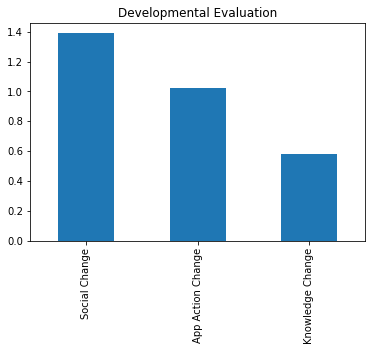

In [50]:
elig1avg = elig1plot[['Social Change', 'App Action Change', 'Knowledge Change']].mean()
elig1avg.plot(kind="bar", title='Developmental Evaluation')

<AxesSubplot:title={'center':'Diagnosed Condition'}>

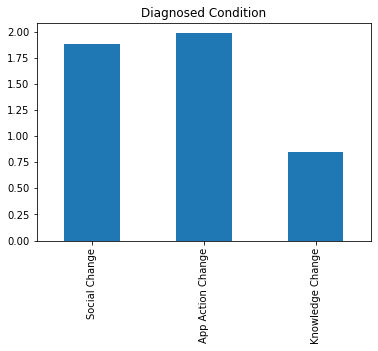

In [51]:
elig2avg = elig2plot[['Social Change', 'App Action Change', 'Knowledge Change']].mean()
elig2avg.plot(kind="bar", title='Diagnosed Condition')

<AxesSubplot:title={'center':'Diagnosed Condition and Developmental Evaluation'}>

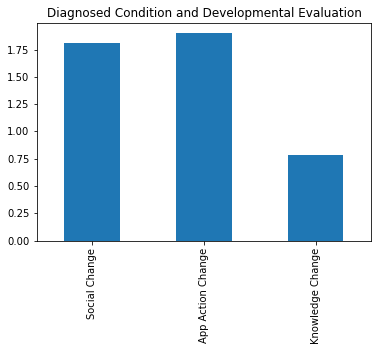

In [52]:
elig3avg = elig3plot[['Social Change', 'App Action Change', 'Knowledge Change']].mean()
elig3avg.plot(kind="bar", title='Diagnosed Condition and Developmental Evaluation')

In [53]:
elig_cat1['month_count'].mean()

14.661073825503356

In [54]:
elig_cat2['month_count'].mean()

22.174743024963288

In [55]:
elig_cat3['month_count'].mean()

20.29513888888889

In [56]:
##can i merge 3 together to plot avg months based on category?

avgmonthperelig = pd.merge(elig_cat1, elig_cat2, how='outer', on='district').merge(elig_cat3, how='outer', on='district')
avgmonthperelig.shape

(33008583, 49)